# Basic MLP Classification with Numpy

From https://cs231n.github.io/neural-networks-case-study/#grad

In [12]:
import numpy as np
import matplotlib.pyplot as plt

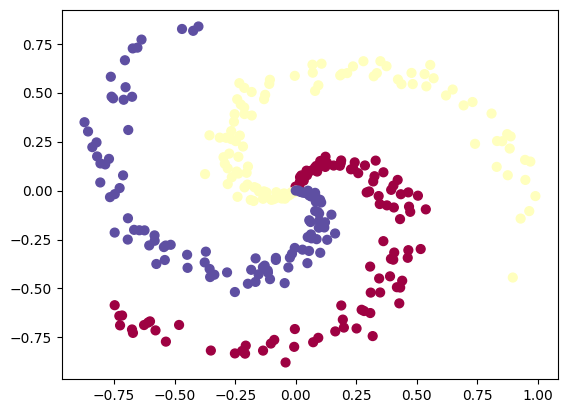

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
print(X.shape, y.shape)

(300, 2) (300,)


In [4]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [5]:
print(W.shape, b.shape, W2.shape, b2.shape)

(2, 100) (1, 100) (100, 3) (1, 3)


In [6]:
# Forward Pass
def forward(X, W, b, W2, b2, reg):
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
    # compute the class probabilities (softmax)
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
    return probs

In [7]:
def backward(probs, X, W2, W, b, b2, reg):
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
    
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    return W, b, W2, b2

In [8]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
    fp = forward(X, W, b, W2, b2, reg)
    W, b, W2, b2 = backward(fp, X, W2, W, b, b2, reg)

iteration 0: loss 1.098647
iteration 1000: loss 0.299487
iteration 2000: loss 0.280012
iteration 3000: loss 0.256481
iteration 4000: loss 0.248906
iteration 5000: loss 0.246460
iteration 6000: loss 0.245386
iteration 7000: loss 0.244796
iteration 8000: loss 0.244341
iteration 9000: loss 0.243564


In [9]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


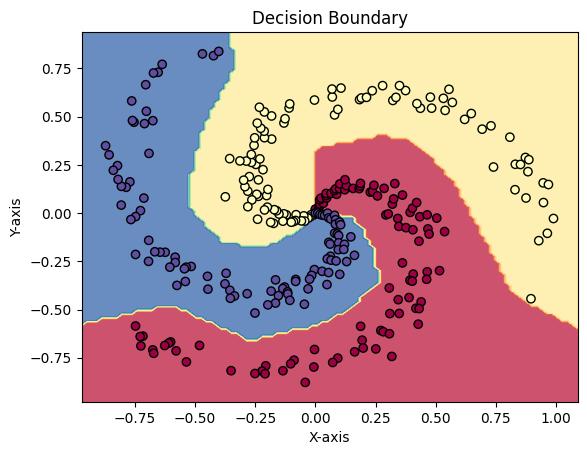

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, W, b, W2, b2, reg):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Forward pass to get probabilities
    probs = forward(grid_points, W, b, W2, b2, reg)  # Assuming forward returns (probs, loss)
    
    # Get the predicted class for each point in the grid
    predictions = np.argmax(probs, axis=1)
    
    # Reshape the predictions back into the grid shape
    Z = predictions.reshape(xx.shape)
    
    # Plot decision boundary and scatter plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Decision Boundary')
    plt.show()

# Assuming X and y are your data, W, b, W2, b2 are your parameters, and reg is your regularization parameter
plot_decision_boundary(X, y, W, b, W2, b2, reg)